start point in the list is 93

(93 - 55) + (148 - 93) + (176 - 148) + (180 - 176) + (199 - 180) + (0 - 199) + (14 - 0) + (27 - 14) + (42 - 27) = 385

total number of cylinders is 385

55 --> 93 --> 148 --> 176 --> 180 --> 199 --> 0 --> 14 --> 27 --> 42

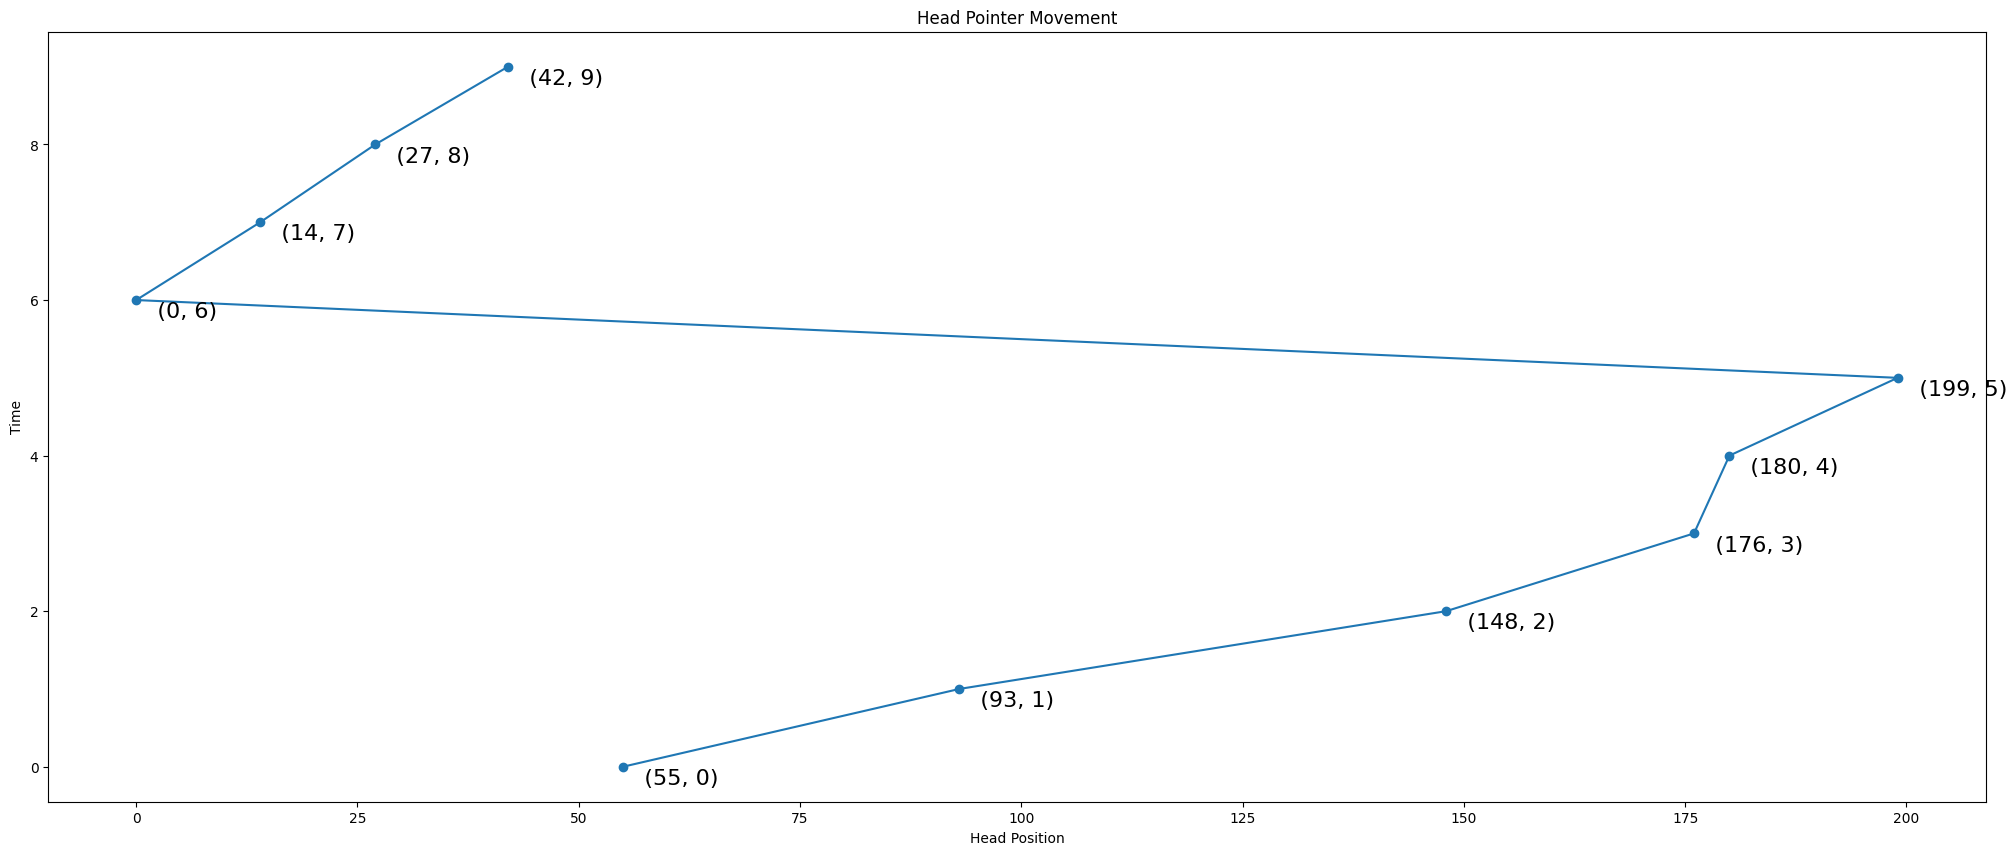

In [1]:
import matplotlib.pyplot as plt

total_tracks_is_disk = 200
tracks = [93, 176, 42, 148, 27, 14, 180]
back = [0]
start_point = tracks[0]
front = [199]
head_pointer = 55
started = False
started1 = False
number_of_cylinders = []
head_positions = []
head_positions.append(head_pointer)

forwarded = (
    True
    if head_pointer < tracks[0]
    or (head_pointer == tracks[0] and head_pointer < tracks[1])
    else False
)


while tracks:
    current_track = tracks[0]
    if (current_track < head_pointer and current_track <= start_point) or (head_pointer == tracks[0] and tracks[0] > tracks[1] and not started1):
        back.append(current_track)
    else:
        front.append(current_track)
    started1 = True
    tracks.remove(current_track)


front = sorted(front)
back = sorted(back)
tracks = front + back if forwarded else sorted(back, reverse=True ) + sorted(front,reverse=True)


while tracks:
    next_pos = tracks[0]
    print(f'start point in the list is {next_pos}\n\n({next_pos} - {head_pointer})', end=' + ') if not started else print(f'({next_pos} - {head_pointer})', end=' + ' if len(tracks)> 1 else '')
    started = True
    
    
    number_of_cylinders.append(abs(next_pos - head_pointer))
    tracks.remove(next_pos)
    head_pointer = next_pos
    head_positions.append(head_pointer)

print(f' = {sum(number_of_cylinders)}')
print()
print(f'total number of cylinders is {sum(number_of_cylinders)}')
print()

for pointers in head_positions:
    print(f'{pointers}',end=' --> ' if pointers != head_positions[-1] else '')

time = range(len(head_positions))
plt.figure(figsize=(25, 10))
plt.plot(head_positions, time, marker='o') 

plt.xlabel('Head Position') 
plt.ylabel('Time') 
plt.title('Head Pointer Movement')
for i, (pos, t) in enumerate(zip(head_positions, time)):
    plt.text(pos, t, f'\n   ({pos}, {t})', ha='left', va='center',fontsize = 16) 
plt.show()
